<a href="https://colab.research.google.com/github/Prabhu-2004-04/Deep-Learning/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchversion

ERROR: Could not find a version that satisfies the requirement torchversion (from versions: none)
ERROR: No matching distribution found for torchversion


In [ ]:
import torch
import torchvision

In [ ]:
!pip install torchinfo

In [ ]:
import torch.nn as nn
import torch.optim as optim
import torchinfo
import torchvision.transforms as transforms
#from torchversion.utils import save_image
import matplotlib.pyplot as plt
import os

In [ ]:

image_size=28*28

hidden_size = 256

latent_size=64

batch_size=100

learning_rate = 0.0002

num_epochs=5

In [ ]:
class Generator(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(Generator, self).__init__()

    self.model=nn.Sequential(

    nn.Linear(input_size, hidden_size),

    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),

    nn.ReLU(),

    nn.Linear(hidden_size, output_size),

    nn.Tanh()
    )
  def forward(self, x):

    return self.model(x)
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size): # Corrected to __init__
        super(Discriminator, self).__init__() # Corrected to __init__

        self.model = nn.Sequential( # Assigned self.model within __init__

            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(0.2),

            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.2),

            nn.Linear(hidden_size, 1),

            nn.Sigmoid() # Corrected to nn.Sigmoid()
        )

    def forward(self, x):

        return self.model(x)

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Use transforms.Compose instead of transform.Compose
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.86MB/s]


In [ ]:
generator = Generator(latent_size,hidden_size,image_size) # Create an instance of the Generator class
discriminator = Discriminator(image_size, hidden_size) # Create an instance of the Discriminator class

criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate) # Use parameters() and lr
optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate) # Use parameters() and lr, create optimizer_d for discriminator

In [ ]:
from torchvision.utils import save_image # Import save_image

In [ ]:
def denorm(x):
  return (x+1)/2
os.makedirs("./generated_images", exist_ok=True)
for epoch in range(num_epochs):
  for i, (images, _) in enumerate(dataloader):
    batch_size = images.size(0)
    images = images.view(batch_size, -1)
    real_label= torch.ones(batch_size, 1)
    fake_label= torch.zeros(batch_size, 1)
    outputs=discriminator(images)
    d_loss_real=criterion(outputs, real_label)
    real_scores=outputs
    z=torch.randn(batch_size, latent_size)
    fake_images=generator(z)
    outputs=discriminator(fake_images)
    d_loss_fake=criterion(outputs, fake_label)
    fake_scores=outputs
    d_loss=d_loss_real+d_loss_fake
    discriminator.zero_grad()
    d_loss.backward()
    optimizer_d.step()
    z=torch.randn(batch_size, latent_size)
    fake_images=generator(z)
    outputs=discriminator(fake_images)
    g_loss=criterion(outputs, real_label) # Changed real_labels to real_label
    generator.zero_grad()
    g_loss.backward()
    optimizer_g.step()
    if (i+1)%100==0:
      print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")
    if (epoch+1) % 10 == 0:
      images=images.reshape(images.size(0), 1, 28, 28)
      save_image(denorm(fake_images), os.path.join("./generated_images", "real_images.png")) # save_image is now defined

Epoch [1/5], Step [100/600], d_loss: 0.3525, g_loss: 4.9372
Epoch [1/5], Step [200/600], d_loss: 0.1997, g_loss: 3.9565
Epoch [1/5], Step [300/600], d_loss: 0.3299, g_loss: 3.7514
Epoch [1/5], Step [400/600], d_loss: 0.1579, g_loss: 4.2940
Epoch [1/5], Step [500/600], d_loss: 0.3410, g_loss: 3.7753
Epoch [1/5], Step [600/600], d_loss: 0.2837, g_loss: 3.9201
Epoch [2/5], Step [100/600], d_loss: 0.3751, g_loss: 3.9616
Epoch [2/5], Step [200/600], d_loss: 0.4073, g_loss: 3.6038
Epoch [2/5], Step [300/600], d_loss: 0.6153, g_loss: 3.1644
Epoch [2/5], Step [400/600], d_loss: 0.4728, g_loss: 6.3970
Epoch [2/5], Step [500/600], d_loss: 0.2889, g_loss: 4.0755
Epoch [2/5], Step [600/600], d_loss: 0.2832, g_loss: 4.6688
Epoch [3/5], Step [100/600], d_loss: 0.2660, g_loss: 4.6916
Epoch [3/5], Step [200/600], d_loss: 0.3553, g_loss: 5.1640
Epoch [3/5], Step [300/600], d_loss: 0.3467, g_loss: 2.9829
Epoch [3/5], Step [400/600], d_loss: 0.3308, g_loss: 4.0859
Epoch [3/5], Step [500/600], d_loss: 0.3

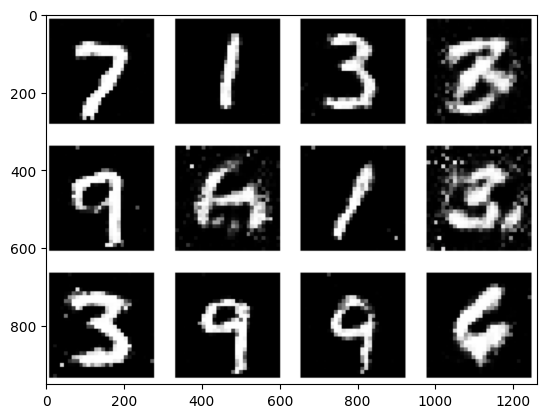

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread("/content/1_ezYuRLT9nfNSEeGRs4mQ7g.png")
plt.imshow(img)
plt.show()